### <table><tr border=1><td ><img src="Mainpic.png" align = "left"  height="100%" /></td><td><img align = "right"  src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true"  width="25%" /></td>
</tr>
    <tr><td align = "right">ML Advanced Project</td></tr>
</table>


---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Dropping ID Column**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Encoding Categorical Features**](#Section71)<br>
  - **7.2** [**Feature Scaling**](#Section72)<br>
  - **7.3** [**Feature Selection**](#Section73)<br>
  - **7.4** [**Data Preparation**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Base Classifiers Comparison on Cross Validation Training**](#Section81)<br>
  - **8.2** [**Hyperparameters Tuning**](#Section82)<br>
  - **8.3** [**Ensemble Methods**](#Section83)<br>
    - **8.3.1** [**Voting Classifier**](#Section831)<br>
    - **8.3.2** [**Bagging Classifier**](#Section832)<br>
    - **8.3.3** [**Stacking Ensemble**](#Section833)<br>
  - **8.4** [**Gradient Descent**](#Section84)<br>

**9.** [**Conclusion**](#Section9)<br>

<a name = Section1></a>
# 1. Introduction:
Ever wondered what Halloween is all about!

Halloween is a holiday celebrated each year on October 31, and Halloween 2020 was 
on Saturday, October 31. 
The tradition originated with the ancient Celtic festival of Samhain.
This day marked the end of summer and the harvest and the beginning of the dark, 
cold winter, a time of year that was often associated with human death. 
Celts believed that on the night before the new year, the boundary between the 
worlds of the living and the dead became blurred. On the night of October 31 they celebrated Samhain, 
when it was believed that the ghosts of the dead returned to earth.
In addition to causing trouble and damaging crops, Celts thought that the presence of the 
otherworldly spirits made it easier for the Druids, or Celtic priests, to make predictions 
about the future. For a people entirely dependent on the volatile natural world, 
these prophecies were an important source of comfort during the long, dark winter.

With evolution of time we have got variety of spirits like Ghosts, Ghouls and Goblins and as we can see from
history Ghosts were useful for future predictions we heard dreaded stories about Ghouls and Goblins.

What better could it be if we could predict with our Data analysis using our Machine learning knowledge who we have around us haunting us! Scares!!! 

Let's take a challenge. 

<img src="Mainpic.jfif" align = "left"  height="100%" />

<a name = Section2></a>
# 2. Problem Statement:
Our world is occupied by spritual creatures some are good some are bad and some are ver bad. We must know who we have around us. We thought of using machine learning algorithms to train our models based on characteristics of creatures based on past data we have and then become read to predict the forthcoming creatures. What Say! Most impartant thing here, as we know we have three classes of creatures. Also, we must check our prediction accuracy in terms of right prediction all the time. We can't have False Positive or False Negative because in both cases we will end up in scare of our life!

Let's begin with some introduction of data we have got. Here is a small(371 records) set of data for training our model to predict a multiclass outcome. Data set comes with characteristics of each creature in the form of 'Bone Length', 'Rotten Flesh', 'Hair Length', 'Has Soul' and 'Color' associated with creature and Also, a target feature associated with each one of these i.e. 'Type'. Let's use our knowledge of machine learning and explore which model will give us most accurate prediction to identify whether the creature we are dealing with is 'Ghost', Ghoul' or 'Goblin'. Accurate and precise prediction can save us a life! No?



<a name = Section3></a>
# 3. **Installing & Importing Libraries**

<a name = Section31></a>
## 3.1 Installing Libraries

In [52]:
#Only if required
#!pip install xgboost
#!pip install lightgbm


<a name = Section32></a>
## 3.2 Importing Libraries

In [53]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.utils import shuffle                                   # To shuffle the data
#from sklearn.impute import KNNImputer                               # To performing iterative imputing over missing data
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
from sklearn.base import BaseEstimator                              # To create custom transformers
from sklearn.base import ClassifierMixin                            # To create custom transformers
from sklearn.base import TransformerMixin                           # To create custom transformers
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
#from yellowbrick.model_selection import FeatureImportances          # To select important features out of the model
from sklearn.model_selection import KFold                           # To perform K-fold executions

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import precision_recall_curve                  # To plot precision recall curve
#from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression                 # To create a logistic model
from sklearn.linear_model import SGDClassifier                      # To create a SGD-based model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn import cross_validation
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

<a name = Section4></a>
# 4. Data Acquision and Description: 
Data sets we would be using are provided by INSAID. We have following details:
- train.csv - <a href="https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_train.csv">the training set </a>
   
- test.csv - <a href="https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_test.csv">the test set </a>


</br>

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 371 | 6 | 20.4 KB| 

</br>

| Id | Features | Description |
| :-- | :--| :--| 
|01|**id**|id of the creature.|
|02|**bone_length**|average length of bone in the creature, normalized between 0 and 1.|
|03|**rotting_flesh**|percentage of rotting flesh in the creature.|
|04|**hair_length**|average hair length, normalized between 0 and 1.|
|05|**has_soul**|percentage of soul in the creature.|
|06|**color**|dominant color of the creature: 'white','black','clear','blue','green','blood'.| 
|07|**type**|__target variable:__ 'Ghost', 'Goblin', and 'Ghoul'

In [54]:
#Loading Training Data in pandas dataframe for analysis
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_train.csv')

<a name = Section41></a>
## 4.1 Data Description

In [55]:
df.describe(include = 'all')

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
count,371.00000,371.00000,371.00000,371.00000,371.00000,371,371
unique,nan,nan,nan,nan,nan,6,3
top,nan,nan,nan,nan,nan,white,Ghoul
freq,nan,nan,nan,nan,nan,137,129
mean,443.67655,0.43416,0.50685,0.52911,0.47139,NaN,NaN
std,263.22249,0.13283,0.14636,0.16990,0.17613,NaN,NaN
min,0.00000,0.06103,0.09569,0.13460,0.00940,NaN,NaN
25%,205.50000,0.34001,0.41481,0.40743,0.34800,NaN,NaN
50%,458.00000,0.43489,0.50155,0.53864,0.46637,NaN,NaN
75%,678.50000,0.51722,0.60398,0.64724,0.60061,NaN,NaN


**Observation:**

- None of the features have 0 value or any other garbage values
- Minimum value of has soul is much less as compared to other features
- Values at 50% for all features look almost similar, which indicates normal distribution
- 6 unique values of color, Max frequency is of white color and frequency is 137
- 3 unique values of creature types, Max frequency is of creature type Ghoul and frequency is 129

<a name = Section42></a>
## 4.2 Data Information

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


### Observation: 
 Looking at dataset info we can see following:
 - There are 371 records
 - No missing values
 - ID columns is a unique Identifier and will cause high cardinality therefore not be of any use for training
 - We have 4 numerical features(bone_length, rotting_flesh, hair_length and has_soul. There values range between 0 and 1
 - 'color' and 'type' (Target Variable) are of type Object and would need encoding 

<a name = Section5></a>
# 5. Data Preprocessing

<a name = Section51></a>
## Dropping ID column

In [57]:
df.drop('id', axis=1, inplace= True)

In [58]:
#Checkin for duplicate observations in training dataset
df.duplicated().any()

False

### Observation:
 Training dataset has no duplicate observations

<a name = Section6></a>
# 6. Explorator Data Analysis

__Q1. What is the relation of color on the type of creature?__

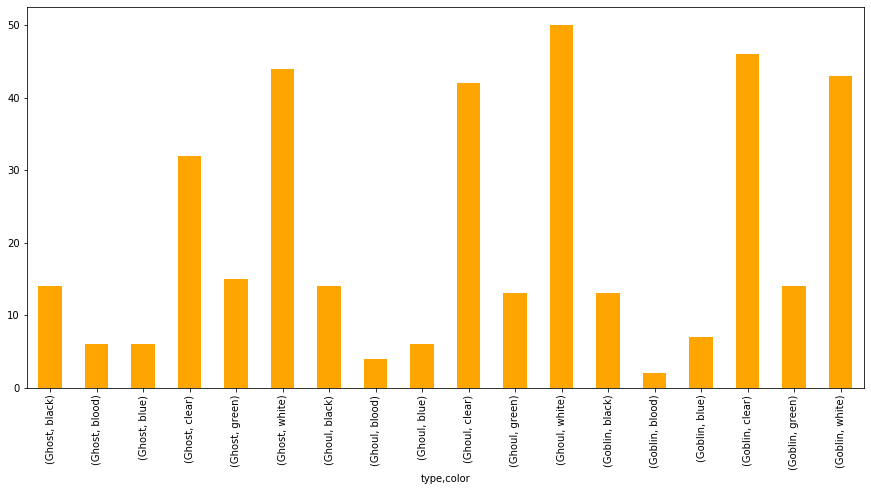

In [59]:
figure = plt.figure(figsize = [15, 7])
df.groupby(['type', 'color'])['color'].count().plot(kind='bar', color='orange')
plt.show()

### Observation:
 We can see that the creatures are not well separated by 'color' feature (We can not see any correlation of color on the type of creature) in that this data column actually adds noise to the problem and serves to decrease classification accuracy. To this end, we will simply drop this column from our data set

__Q2. What is the proportion of features?__

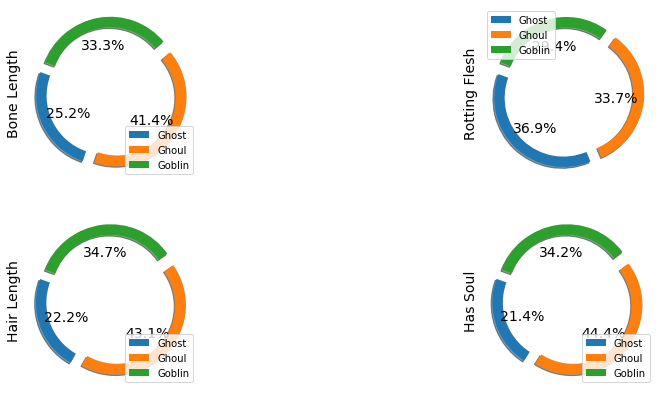

In [60]:
figure = plt.figure(figsize = [15, 7])

# Subplot for Drive Way
plt.subplot(2, 2, 1)
space = np.ones(3)/10
df.groupby('type')['bone_length'].sum().plot(kind='pie', explode=space, fontsize=14, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=160, figsize=[15, 7], 
                                           legend=True, labels=['', '', ''])
plt.legend(['Ghost', 'Ghoul', 'Goblin'])
plt.ylabel('Bone Length', size = 14)

# Subplot for recreational room
plt.subplot(2, 2, 2)
space = np.ones(3)/10
df.groupby('type')['rotting_flesh'].sum().plot(kind='pie', explode=space, fontsize=14, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=160, figsize=[15, 7], 
                                           legend=True, labels=['', '', ''])
plt.legend(['Ghost', 'Ghoul', 'Goblin'])
plt.ylabel('Rotting Flesh', size = 14)

# Subplot for full finished basement
plt.subplot(2, 2, 3)
space = np.ones(3)/10
df.groupby('type')['hair_length'].sum().plot(kind='pie', explode=space, fontsize=14, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=160, figsize=[15, 7], 
                                           legend=True, labels=['', '', ''])
plt.legend(['Ghost', 'Ghoul', 'Goblin'])
plt.ylabel('Hair Length', size = 14)

# Subplot for gas for hot water heating
plt.subplot(2, 2, 4)
space = np.ones(3)/10
df.groupby('type')['has_soul'].sum().plot(kind='pie', explode=space, fontsize=14, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=160, figsize=[15, 7], 
                                           legend=True, labels=['', '', ''])
plt.legend(['Ghost', 'Ghoul', 'Goblin'])
plt.ylabel('Has Soul', size = 14)
plt.show()

#### Observation:
 - Looking at above plots this is evident that Bone length, Hair Length and Soul are prominant features of Ghouls
 - Most prominent feature of Ghost is Rotting Flesh while they have smaller bones, hair length and lowest degree of soul
 - Goblins have all the mediocre features

__Q3. What is the comparison of various feature for creatures?__

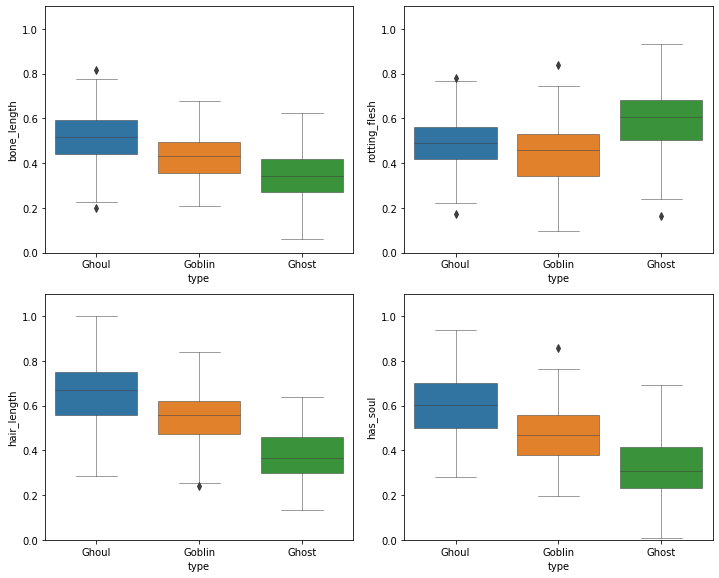

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
plt.tight_layout(w_pad=2.0, h_pad=2.0)
data = df[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']]
for i, column in zip(range(1,data.shape[1]+1), data.columns):
    plt.subplot(2,2,i)
    sns.boxplot(x=df['type'], y=df[column], linewidth=0.5)
    plt.ylabel(column)
    plt.ylim([0,1.1])

#### Observation:
 
Looking at above plots following observations:
- An average Ghoul has large bone length, hair length, have souls with slightly less rotten flesh.
- An average Ghost has short hair, few of them have soul, lowest bone length in all three types and have most rotten flesh.
- An average Goblin has all properties nearly an average of Ghost and Ghoul. Except rotten flesh they have every characteristic lasger than ghost and lower than Ghoul  

__Q4. What are the features correlations?__

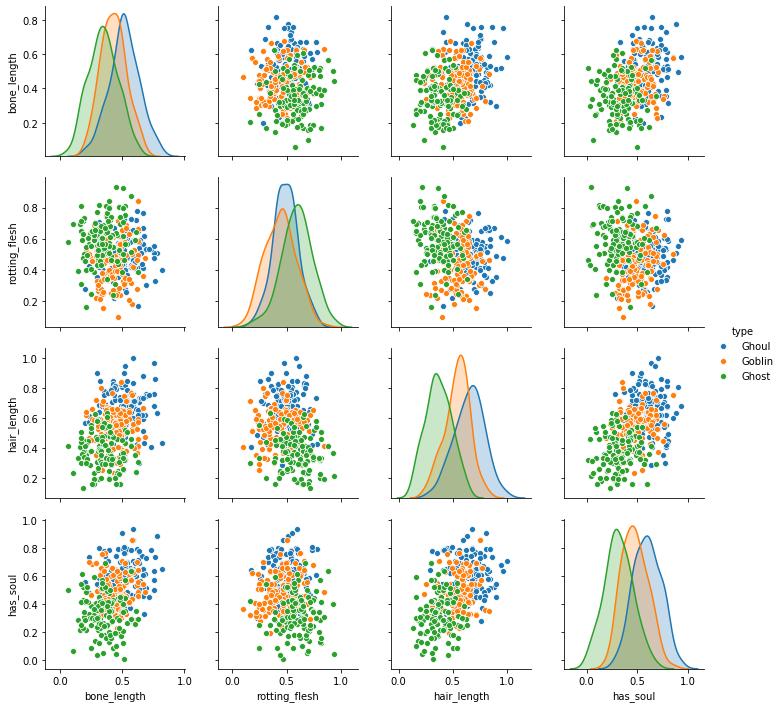

In [62]:
sns.pairplot(df, hue='type')
plt.show()

#### Observations:
 - Diagonal plots show normal distributions of features. This is a good news for us as we don't have to do any transformation
 - The off-diagonal figures show that the creatures are sometimes reasonably well-separated. 
    - For example, plotting “has_soul” vs. “hair_length” shows reasonably good distinction between the three creatures, while plotting “rotting_flesh” vs. “bone_length” results in poor separation. 

__Q5 What are the correlation among features in terms of numerical values?__

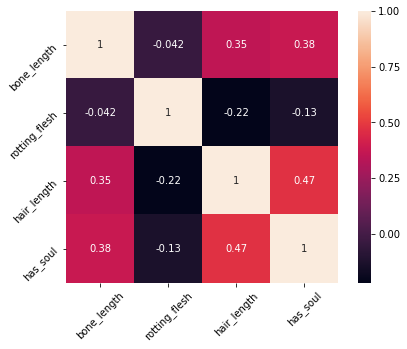

In [63]:
fig, axes = plt.subplots(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True, vmax=1, square=True, linewidths=0)
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

### Observation: 
Looking at the off-diagonal values, it appears that there is some minor correlation between, for example, “has_soul” and “hair_length”. However, in general, these correlation values are quite small. In any case, multicollinearity is really only a nuisance in regression problems and should not affect us in this multiclass classification case.

__Q6. Is Our Dataset balanced?__

In [64]:
#Check the distribution of data in terms of any class imbalance
df.type.value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

__Let's check using Pie Chart as well__

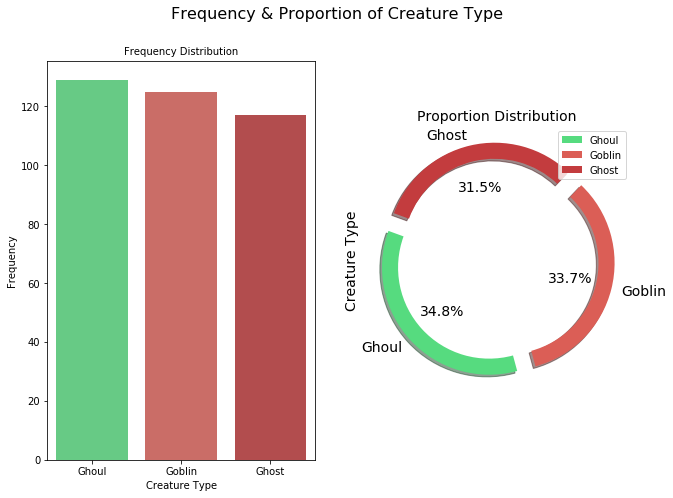

In [65]:
fig = plt.figure(figsize = [8, 7])
plt.subplot(1, 2, 1)
sns.countplot(x = 'type', data = df, palette = ['#56DB7F', '#DB5E56', '#C33C3E'])
plt.xlabel(xlabel = 'Creature Type', size = 10)
plt.ylabel(ylabel = 'Frequency', size = 10)
plt.title(label = 'Frequency Distribution', size = 10)

plt.subplot(1, 2, 2)
space = np.ones(3)/10
df['type'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [10, 7], legend = True, colors = ['#56DB7F', '#DB5E56', '#C33C3E'])
plt.ylabel(ylabel = 'Creature Type', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Creature Type', y = 1.02, size = 16)
plt.show()

#### Observation: Data is fairly balanced.

### Dropping 'color'  

In [66]:
df.drop('color', axis=1, inplace= True)

In [67]:
display(df.head())

,bone_length,rotting_flesh,hair_length,has_soul,type
0,0.35451,0.35084,0.46576,0.78114,Ghoul
1,0.57556,0.42587,0.53140,0.43990,Goblin
2,0.46788,0.35433,0.81162,0.79122,Ghoul
3,0.77665,0.50872,0.63677,0.88446,Ghoul
4,0.56612,0.87586,0.41859,0.63644,Ghost


### Outliers or Anomaly Detection

#### Method1 : Isolation Forest for Anomaly Detection
- They detects anomalies purely based on the fact that anomalies are data points that are different and few.
- It has been implemented without employing any distance or density measure.

In [68]:
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul' ]]
scaler.fit(data)
X_std = scaler.transform(data)
outliers_fraction = 0.01
model =  IsolationForest(contamination=outliers_fraction)
model.fit(X_std) 
df['anomaly2'] = pd.Series(model.predict(X_std))

__Plotting the anamoly data points__

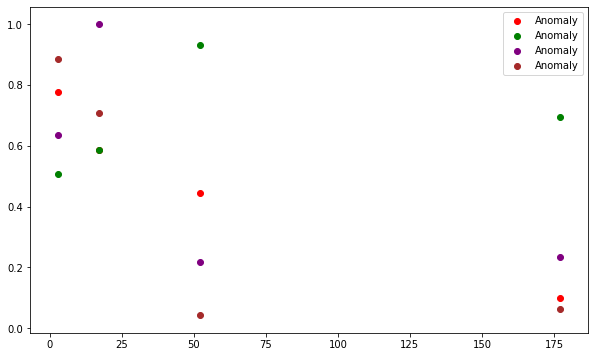

In [69]:
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly2'] == -1, ['bone_length','rotting_flesh','hair_length','has_soul','type']] #anomaly

#ax.plot(df['type'], df['bone_length'], color='blue', label = 'Normal')
ax.scatter(a.index,a['bone_length'], color='red', label = 'Anomaly')
ax.scatter(a.index,a['rotting_flesh'], color='green', label = 'Anomaly')
ax.scatter(a.index,a['hair_length'], color='purple', label = 'Anomaly')
ax.scatter(a.index,a['has_soul'], color='brown', label = 'Anomaly')
plt.legend()
plt.show();

#### Method2: Support Vector Machines-Based Anomaly Detection

In [70]:
model = svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(X_std)
df['anomaly3'] = pd.Series(model.predict(X_std))

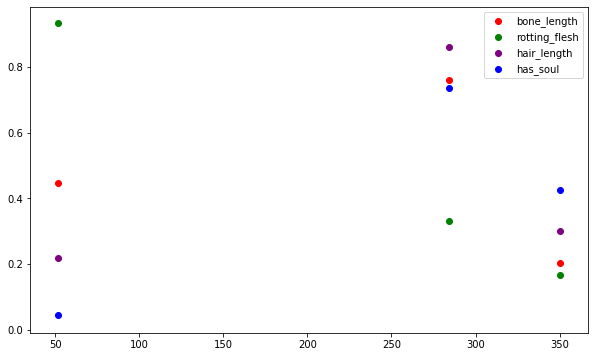

In [71]:
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly3'] == -1, ['bone_length','rotting_flesh','hair_length','has_soul','type']] #anomaly

#ax.plot(df['type'], df['bone_length'], color='blue', label = 'Normal')
ax.scatter(a.index,a['bone_length'], color='red', label = 'bone_length')
ax.scatter(a.index,a['rotting_flesh'], color='green', label = 'rotting_flesh')
ax.scatter(a.index,a['hair_length'], color='purple', label = 'hair_length')
ax.scatter(a.index,a['has_soul'], color='blue', label = 'has_soul')
plt.legend()
plt.show();

#### Observation:
  We can see we have a few outliers but they are not going to impact our Models severely. we will not remove them for our Model trainings.

<a name = Section7></a>
# **7. Post Data Processing & Feature Selection**

<a name = Section72></a>
## 7.2 **Feature Scaling**

We use StandardScaler to scale the feature columns so that each has a mean of zero and unit standard deviation.

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul' ]]
scaler.fit(data)
X_std = scaler.transform(data)


In [73]:
X_std

array([[-0.60041788, -1.06738561, -0.37338608,  1.76102365],
       [ 1.06593116, -0.55404941,  0.0134793 , -0.17904845],
       [ 0.25416161, -1.0434982 ,  1.6649809 ,  1.81835041],
       ...,
       [ 0.35792208, -0.03900771, -0.19253577,  0.4128174 ],
       [-1.04947539,  1.80922963,  0.32054796, -0.97090362],
       [ 1.77936379,  1.78995298,  1.22683293,  0.77884197]])

In [74]:
#Creating a dataframe with saled features only
data_sd = pd.DataFrame(X_std, columns=['bone_length', 'rotting_flesh', 'hair_length', 'has_soul' ])
data_sd.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.00000,371.00000,371.00000,371.00000
mean,-0.00000,0.00000,-0.00000,0.00000
std,1.00135,1.00135,1.00135,1.00135
min,-2.81279,-2.81309,-2.32515,-2.62656
25%,-0.70977,-0.62969,-0.71718,-0.70151
50%,0.00551,-0.03624,0.05616,-0.02854
75%,0.62616,0.66453,0.69622,0.73464
max,2.88602,2.91199,2.77526,2.63986


### Boxplot of features after scaling the data

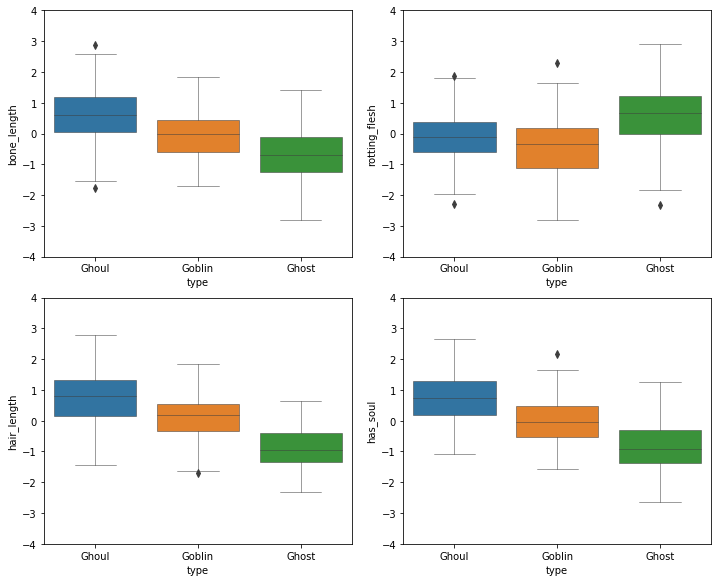

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
plt.tight_layout(w_pad=2.0, h_pad=2.0)
data = data_sd[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']]
for i, column in zip(range(1,data.shape[1]+1), data.columns):
    plt.subplot(2,2,i)
    sns.boxplot(x=df['type'], y=data_sd[column], linewidth=0.5)
    plt.ylabel(column)
    plt.ylim([-4.0,4.0])

Looking at the graphs above we can say that mean of each feature has come close to 0.

<a name = Section71></a>
## 7.1 Feature Encoding** 
  Since our Target Variable 'type' is String, we need to do encoding

In [76]:
enc = LabelEncoder()
df['type'] = enc.fit_transform(df['type'])
y = df['type'].values

In [77]:
y.shape # Checking unique values our target variable has

(371,)

<a name = Section73></a>
## 7.3 Feature Selection**
### Method1: Checking Variance Explanability of features (PCA without using Classifier)

In [78]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [79]:
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

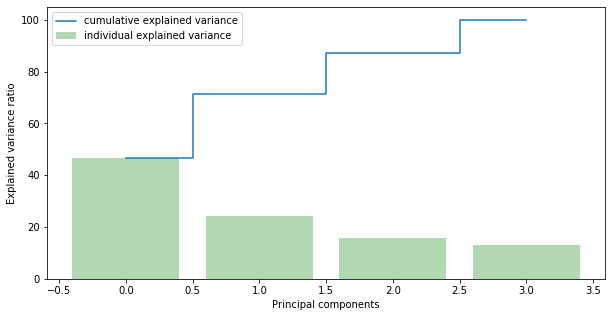

In [80]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

#### Observation: 
   Above Graph depicts that first three components explain above 85% of variance. As our data set is small we will not be affected even if we carried on with whole data set for processing.

### Method2: Using RandomForest Classifier

In [81]:
from sklearn.feature_selection import SelectFromModel              
# it may take some time
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(data_sd, df['type'])

# Extracting list of important features
selected_feat = data_sd.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 2
Threshold set by Model: 0.25
Important Features: ['hair_length', 'has_soul']


__Observation:
Based on RandomForest Classifier method of feature selection two features 'hair_length', 'has_soul' will give 75% variance__

<a name = Section74></a>
## 7.4 Data Preparation**

In [82]:
#For our Basic Model training we are only removing ID and color columns Keeping type as target variable and rest as our feature set
X_std.shape

(371, 4)

In [83]:
df['type'].shape

(371,)

In [84]:
y.shape

(371,)

<a name = Section8></a>
# **8 Model Development & Evaluation**

### Our Data is ready for model training.

As our problem is supervised (classification) we can apply supervised learnings and see how our model behaves for prediction.
We can try following to begin with:
 - KNN
 - SVM
 - Cosine Similarity
 - Logistic Regression
 - Random Forest Classifier
 - Decision Tree Classifier



<a name = Section81></a>
## 8.1 Base Classifiers Comparison on Cross Validation Training

In [126]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
       
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost
    XGBClassifier(objective="multi:softmax", eval_metric = "merror")    
    ]

#splitting dataset in cross-validation with this ShuffleSplit splitter class:
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 5, test_size = .3, train_size = .7 ) # run model 10x with 70/30 split intentionally leaving out 10%
#random_state = 0 
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = df['type'] # Y 

#index through MLA and save performance to table
row_index = 0
Feature_Importance = {}

for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    scoring_list = ['precision_macro', 'recall_macro', 'f1_macro']
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_std, y, cv  = cv_split,return_train_score=True,scoring='f1_macro')
    #display(cv_results)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_std, y)

    try:
      Feature_Importance[MLA_name] = alg.feature_importances_
    except AttributeError:
      pass
    #print(MLA_name)  
    MLA_predict[MLA_name] = alg.predict(X_std)
    #print(MLA_predict[MLA_name])
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
MLA_compare['Difference'] = (MLA_compare['MLA Test Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100
display(MLA_compare.sort_values(by='MLA Test Accuracy Mean',ascending=False))

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,Difference
18,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}",0.75070,0.76057,0.08461,0.00121,0.98643
19,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}",0.77706,0.75091,0.14923,0.00160,-2.61506
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}",0.75443,0.74456,0.04698,0.31300,-0.98730
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_iter_predict': 100, 'multi_class': 'one_vs_rest', 'n_jobs': None, 'n_restarts_optimizer': 0, 'optimizer': 'fmin_l_bfgs_b', 'random_state': None, 'warm_start': False}",0.80805,0.73803,0.07605,0.18686,-7.00112
11,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.75626,0.73347,0.04113,0.00137,-2.27836
13,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}",0.80562,0.73057,0.05347,0.01758,-7.50498
14,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.5, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}",0.80661,0.72294,0.02460,0.02285,-8.36638
15,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}",0.73168,0.72053,0.06102,0.01745,-1.11487
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}",1.00000,0.70980,0.06898,0.40088,-29.02006
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}",0.72245,0.70527,0.09759,0.10301,-1.71790


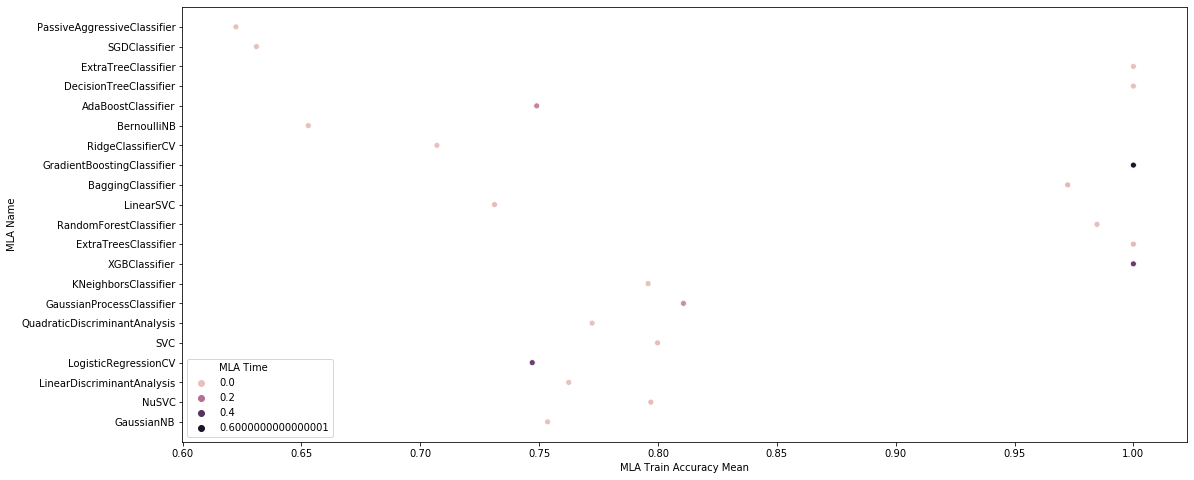

In [86]:
#from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
sns.scatterplot(x="MLA Train Accuracy Mean", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))
plt.show()

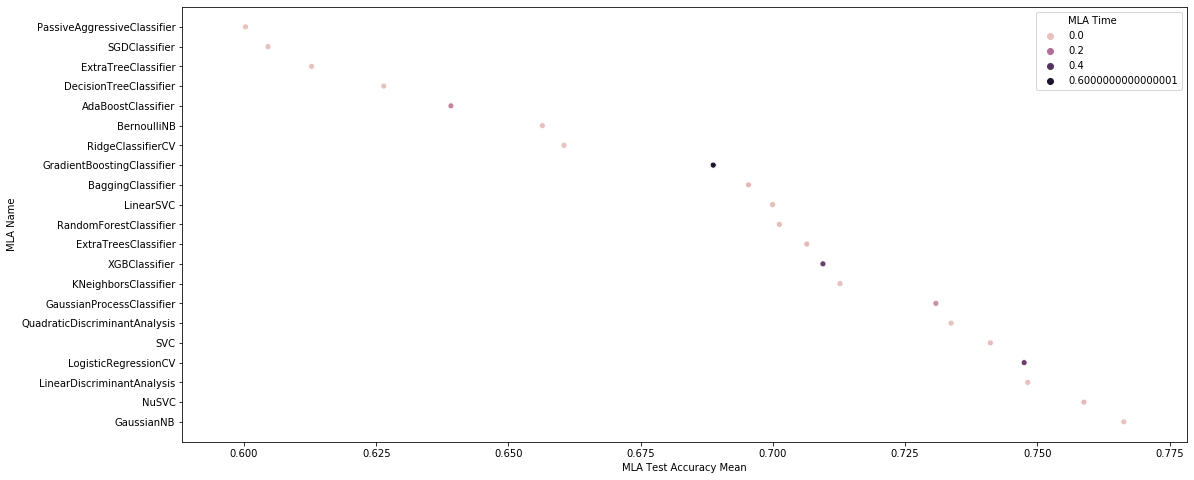

In [87]:
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
sns.scatterplot(x="MLA Test Accuracy Mean", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))
plt.show()

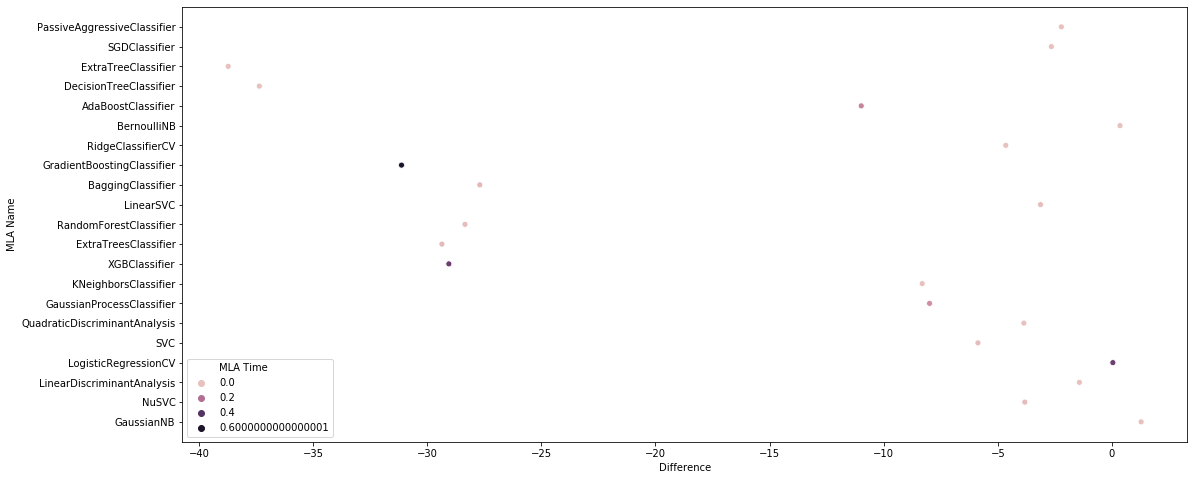

In [88]:
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
sns.scatterplot(x="Difference", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))
plt.show()

__Observation:__
 - Considering Mean Test Accuracy NuSVC gets best. However, it's training score is low compared to others like GaussianProcessClassifier, Bagging Classifier  
 - LogisticRegressionCV shows better test score than train score
 - ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,XGBClassifier,
 DecisionTreeClassifier, ExtraTreeClassifier have shown very high train score where as considerably low test scores
which indicates overfitting
 - PassiveAggressiveClassifier, SGDClassifier,  does not show good performance for Training and Test as compared to others
 - In terms of Time taken by Algorithms we can see Naive Bayes Classifiers are among the fastest whereas XGBoostClassifier has taken longest time. We have ver small data set but as we get bigger data sets proccesing time will be a desirable attribute of our models 
   

#### Let's do a feature Importance excercise based on the various classifiers we have run

In [89]:
Feature_Importance
feature_names = data_sd.columns
feat_imp_df = pd.DataFrame.from_dict(Feature_Importance)
feat_imp_df.index = feature_names
feat_imp_df

,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,DecisionTreeClassifier,ExtraTreeClassifier,XGBClassifier
bone_length,0.24000,0.20104,0.15820,0.17750,0.13943,0.17482,0.16314
rotting_flesh,0.24000,0.19151,0.16004,0.18805,0.21992,0.17983,0.18792
hair_length,0.24000,0.31998,0.39564,0.27838,0.34015,0.35404,0.37500
has_soul,0.28000,0.28747,0.28611,0.35607,0.30050,0.29132,0.27394


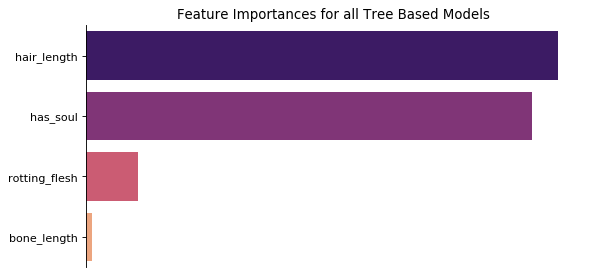

In [90]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),
                         columns=feat_imp_df.columns,
                         index=feat_imp_df.index)

scaled_fi['Overall'] = scaled_fi.sum(axis=1)
#print(scaled_fi.head())
ordered_ranking = scaled_fi.sort_values('Overall', ascending=False)
fig, ax = plt.subplots(figsize=(8,4), dpi=80)
sns.barplot(data=ordered_ranking, y=ordered_ranking.index, x='Overall', palette='magma')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(False)
ax.set_title('Feature Importances for all Tree Based Models');

#### Observation:
  From above plot this is visible that for most of the algorithms 'has_soul' and 'hair_length' are most important features.

#### Let's do a comparison of Classifiers performance with only three features we identified above

In [91]:
scaled_sorted = scaled_fi.sort_values(by = ['Overall'], ascending = False)
important_col = list(scaled_sorted[:3].index)

Target = y

data1_x_bin = data_sd[important_col]
data1_x_bin.shape
y.shape

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost
    XGBClassifier(objective="multi:softmax", eval_metric = "merror")    
    ]

#split dataset in cross-validation with this splitter class
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 0 ) 

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = df['type']

#index through MLA and save performance to table
row_index = 0
Feature_Importance = {}

for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    #print(MLA_name)
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    #score model with cross validation
    cv_results = model_selection.cross_validate(alg, data1_x_bin, y, cv  = cv_split,return_train_score=True,scoring='f1_macro')

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1_x_bin, y)

    try:
      Feature_Importance[MLA_name] = alg.feature_importances_
    except AttributeError:
      pass
    
   
    MLA_predict[MLA_name] = alg.predict(data1_x_bin)
    #print(MLA_name)
    row_index+=1

    
#print and sort table
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
MLA_compare['Difference'] = (MLA_compare['MLA Test Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,Difference
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_iter_predict': 100, 'multi_class': 'one_vs_rest', 'n_jobs': None, 'n_restarts_optimizer': 0, 'optimizer': 'fmin_l_bfgs_b', 'random_state': None, 'warm_start': False}",0.76027,0.72663,0.12878,0.14160,-3.36423
19,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}",0.73563,0.72239,0.11650,0.00400,-1.32312
14,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.5, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}",0.78539,0.71476,0.13659,0.01720,-7.06305
12,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.77858,0.71255,0.13852,0.00220,-6.60291
15,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}",0.72945,0.71239,0.12100,0.01100,-1.70572
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}",0.73554,0.71082,0.16694,0.23260,-2.47136
11,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.73048,0.70526,0.07909,0.00320,-2.52173
13,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}",0.75396,0.70472,0.13397,0.01320,-4.92439
18,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}",0.72338,0.70167,0.09765,0.00220,-2.17103
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_weight': None, 'cv': None, 'fit_intercept': True, 'normalize': False, 'scoring': None, 'store_cv_values': False}",0.72463,0.70100,0.13557,0.00300,-2.36304


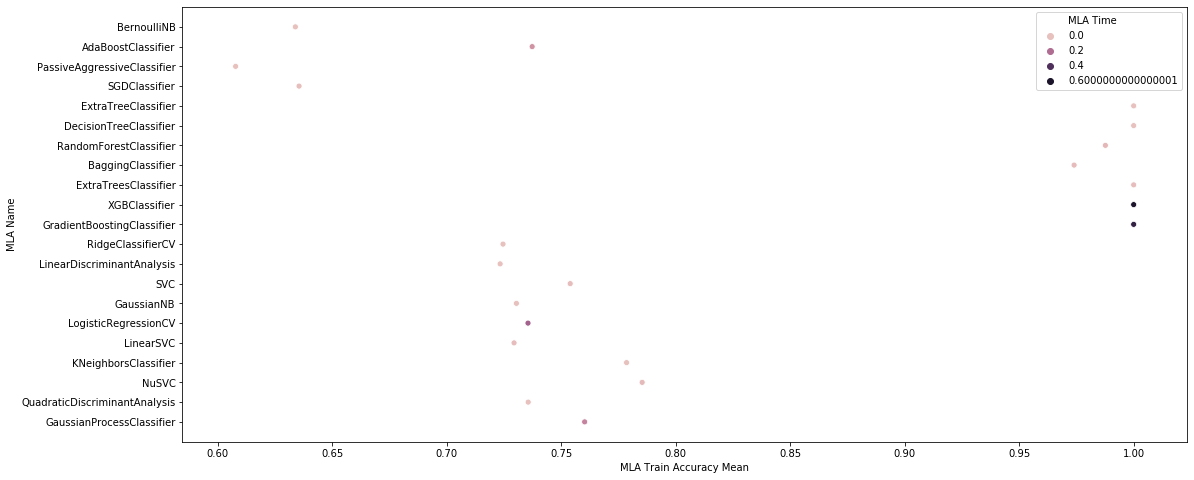

In [92]:
#from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
sns.scatterplot(x="MLA Train Accuracy Mean", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))
plt.show()

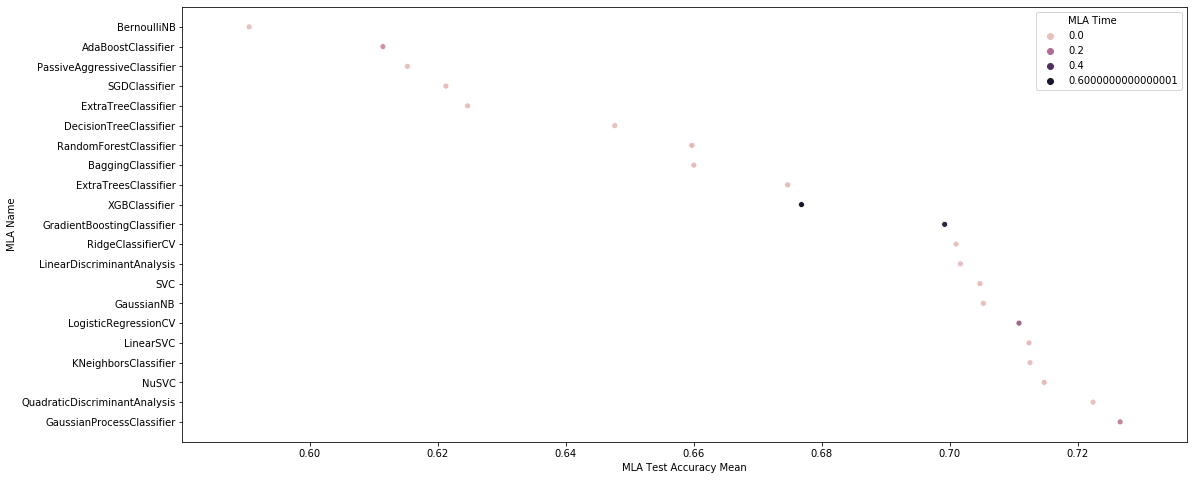

In [93]:
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
sns.scatterplot(x="MLA Test Accuracy Mean", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))
plt.show()

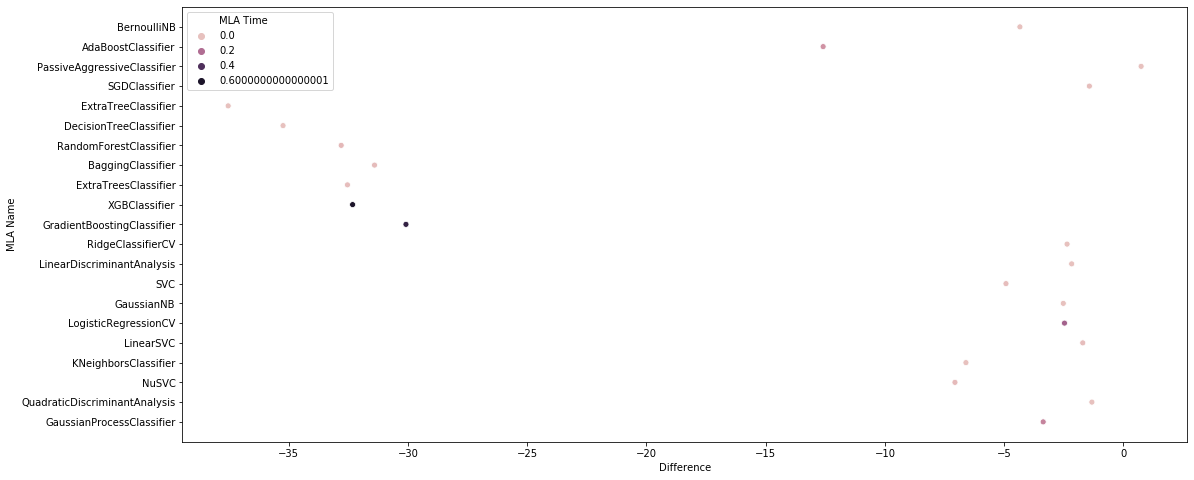

In [94]:
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
sns.scatterplot(x="Difference", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))
plt.show()

__Observation:__
  As expected, training models on only three features have given almost similar results than what we have got with whole set of features in our previous run. This means 4th feature is bone_length is not needed for our models.
  

<a name = Section82></a>
## 8.2 Hyperparameter Tuning

Let's Try to do some more training with some hyperparamter tuning as well.

In [95]:
#params_cv_LR = {'C': np.linspace(0.0001,1,1000), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                'penalty': ['l1', 'l2', 'elasticnet'], 'l1_ratios':np.linspace(0,1,10)}
import warnings
warnings.filterwarnings('ignore')

params = {
'LogisticRegression': {'C': np.logspace(-3,3,7), 
                'penalty': ['l1', 'l2'],
                'max_iter': list(range(100,800,100))},
                #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
'KNeighborsClassifier':  {'n_neighbors': np.linspace(1,50,50).astype(int), 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']},
'QuadraticDiscriminantAnalysis' : {'reg_param': np.linspace(0.0001,10,100)},
'DecisionTreeClassifier' : {'criterion' : ['gini', 'entropy'], 'splitter' : ['random', 'best'], 'max_depth':[2,5,10], 'min_samples_leaf':[2,5,10]},
'RandomForestClassifier' : { 'n_estimators': [16, 32] },
'ExtraTreesClassifier' : { 'n_estimators': [16, 32] },       
'AdaBoostClassifier' : { 'n_estimators': [16, 32] },
'GradientBoostingClassifier' : { 'n_estimators': [16, 32] , 'learning_rate': [0.8, 1.0] },
'SVC' :  [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]

   
}

estimators = {'LogisticRegression': linear_model.LogisticRegression(), 
              'KNeighborsClassifier': KNeighborsClassifier(), 
              'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
              'DecisionTreeClassifier': tree.DecisionTreeClassifier(),
              'RandomForestClassifier': ensemble.RandomForestClassifier(),
              'ExtraTreesClassifier': ensemble.ExtraTreesClassifier(),
              'AdaBoostClassifier': ensemble.AdaBoostClassifier(),
              'GradientBoostingClassifier': ensemble.GradientBoostingClassifier(),
              'SVC': SVC()

             }

scores = {}
best_params = {}
cv_results= {}

for classifier in estimators.keys():
    grid = GridSearchCV(estimators[classifier], params[classifier], cv=5,  refit = True, verbose = 0, scoring='f1_macro', return_train_score=True)
    grid.fit(X_std, y)
    scores[classifier] = grid.best_score_
    best_params[classifier] = grid.best_params_
    cv_results[classifier]= grid.cv_results_

In [96]:
pd.DataFrame(best_params)

,LogisticRegression,KNeighborsClassifier,QuadraticDiscriminantAnalysis,DecisionTreeClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,SVC
C,1.00000,NaN,nan,NaN,nan,nan,nan,nan,10
max_iter,100,NaN,nan,NaN,nan,nan,nan,nan,NaN
penalty,l1,NaN,nan,NaN,nan,nan,nan,nan,NaN
algorithm,NaN,auto,nan,NaN,nan,nan,nan,nan,NaN
n_neighbors,NaN,28,nan,NaN,nan,nan,nan,nan,NaN
reg_param,NaN,NaN,0.70716,NaN,nan,nan,nan,nan,NaN
criterion,NaN,NaN,nan,entropy,nan,nan,nan,nan,NaN
max_depth,NaN,NaN,nan,10,nan,nan,nan,nan,NaN
min_samples_leaf,NaN,NaN,nan,5,nan,nan,nan,nan,NaN
splitter,NaN,NaN,nan,random,nan,nan,nan,nan,NaN


In [120]:
GridS_BS = pd.concat([pd.DataFrame(scores.keys(), columns=['Classifier']), pd.DataFrame(scores.values(), columns=['Best Test Score'])], axis=1) #.sort_values(by = ['Best Score'], ascending=False)
Grid_results = pd.DataFrame(data=cv_results)
mean_test_score ={}
mean_train_score ={}
for classifier in estimators.keys():
    mean_test_score[classifier] = Grid_results.loc['mean_test_score'][classifier].mean()
    mean_train_score[classifier] = Grid_results.loc['mean_train_score'][classifier].mean()
GridS_df = pd.concat([
pd.DataFrame(mean_test_score,  index=[x for x in range(0,1)]).T,
pd.DataFrame(mean_train_score, index=[x for x in range(0,1)]).T], axis=1)
GridS_df.columns=['Mean Test Score', 'Mean Train Score']
GridS_df.reset_index()
GridS_BS
GridS_BS_df = GridS_BS.merge(GridS_df.reset_index(), right_on='index', left_on='Classifier').drop('index', axis=1).set_index('Classifier')
GridS_BS_plot = GridS_BS_df.reset_index()
GridS_BS_df


,Best Test Score,Mean Test Score,Mean Train Score
Classifier,,,
LogisticRegression,0.74154,0.74154,0.75159
KNeighborsClassifier,0.75664,0.75664,0.77244
QuadraticDiscriminantAnalysis,0.76672,0.76672,0.77290
DecisionTreeClassifier,0.64283,0.64283,0.74837
RandomForestClassifier,0.72229,0.72229,1.00000
ExtraTreesClassifier,0.70966,0.70966,1.00000
AdaBoostClassifier,0.69943,0.69943,0.73835
GradientBoostingClassifier,0.70041,0.70041,1.00000
SVC,0.75182,0.75182,0.76307


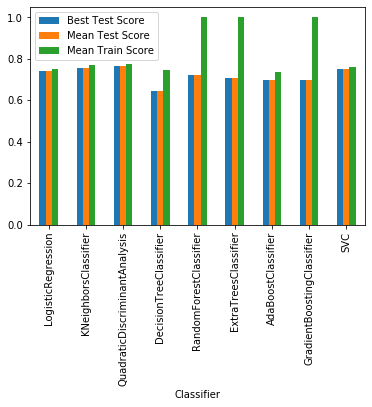

In [121]:
GridS_BS_plot.plot(x="Classifier", y=["Best Test Score", "Mean Test Score", "Mean Train Score"], kind="bar")
plt.show()

__Observation:__ 
 - ExtraTreesClassifer, GradientBoosting Classifier (with Default DT as its base) gave best Mean Train Score. However, KNN, RandomForestClassifier, ExtratreesCLassifier gave best test scores as well. A Clear Winner in terms of Test and Train Scores is  RandomForestClassifier.
 - The Mean cross-validated score of the best_estimator, means classfier performance of score with best parameters after Grid Search. Looking at the results QuadraticDistriminantAnalysis, KNNClassifiers, SVC look clear winners


In [119]:
import warnings
warnings.filterwarnings('ignore')

params = {
'LogisticRegression': {'C': [1], 
                'penalty': ['l1'],
                'max_iter': [100]},
                #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
'KNeighborsClassifier':  {'n_neighbors': [28], 'algorithm' : ['auto']},
'QuadraticDiscriminantAnalysis' : {'reg_param': [0.70716]},
'DecisionTreeClassifier' : {'criterion' : ['gini'], 'splitter' : ['random'], 'max_depth':[10], 'min_samples_leaf':[5]},
'RandomForestClassifier' : { 'n_estimators': [32] },
'ExtraTreesClassifier' : { 'n_estimators': [32] },       
'AdaBoostClassifier' : { 'n_estimators': [16] },
'GradientBoostingClassifier' : { 'n_estimators': [16] , 'learning_rate': [1.0] },
'SVC' :  [
         {'kernel': ['rbf'], 'C': [10], 'gamma': [0.001]},
    ]

   
}

estimators = {'LogisticRegression': linear_model.LogisticRegression(), 
              'KNeighborsClassifier': KNeighborsClassifier(), 
              'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
              'DecisionTreeClassifier': tree.DecisionTreeClassifier(),
              'RandomForestClassifier': ensemble.RandomForestClassifier(),
              'ExtraTreesClassifier': ensemble.ExtraTreesClassifier(),
              'AdaBoostClassifier': ensemble.AdaBoostClassifier(),
              'GradientBoostingClassifier': ensemble.GradientBoostingClassifier(),
              'SVC': SVC()

             }

scores = {}
best_params = {}
cv_results= {}

for classifier in estimators.keys():
    grid = GridSearchCV(estimators[classifier], params[classifier], cv=5,  refit = True, verbose = 0, scoring='f1_macro', return_train_score=True)
    grid.fit(X_std, y)
    scores[classifier] = grid.best_score_
    best_params[classifier] = grid.best_params_
    cv_results[classifier]= grid.cv_results_
GridS_BS = pd.concat([pd.DataFrame(scores.keys(), columns=['Classifier']), pd.DataFrame(scores.values(), columns=['Best Test Score'])], axis=1) #.sort_values(by = ['Best Score'], ascending=False)
Grid_results = pd.DataFrame(data=cv_results)
mean_test_score ={}
mean_train_score ={}
for classifier in estimators.keys():
    mean_test_score[classifier] = Grid_results.loc['mean_test_score'][classifier].mean()
    mean_train_score[classifier] = Grid_results.loc['mean_train_score'][classifier].mean()
GridS_df = pd.concat([
pd.DataFrame(mean_test_score,  index=[x for x in range(0,1)]).T,
pd.DataFrame(mean_train_score, index=[x for x in range(0,1)]).T], axis=1)
GridS_df.columns=['Mean Test Score', 'Mean Train Score']
GridS_df.reset_index()
GridS_BS
GridS_BS_df = GridS_BS.merge(GridS_df.reset_index(), right_on='index', left_on='Classifier').drop('index', axis=1).set_index('Classifier')
GridS_BS_plot = GridS_BS_df.reset_index()
GridS_BS_df

,Best Test Score,Mean Test Score,Mean Train Score
Classifier,,,
LogisticRegression,0.74154,0.74154,0.75159
KNeighborsClassifier,0.75664,0.75664,0.77244
QuadraticDiscriminantAnalysis,0.76672,0.76672,0.77290
DecisionTreeClassifier,0.64283,0.64283,0.74837
RandomForestClassifier,0.72229,0.72229,1.00000
ExtraTreesClassifier,0.70966,0.70966,1.00000
AdaBoostClassifier,0.69943,0.69943,0.73835
GradientBoostingClassifier,0.70041,0.70041,1.00000
SVC,0.75182,0.75182,0.76307


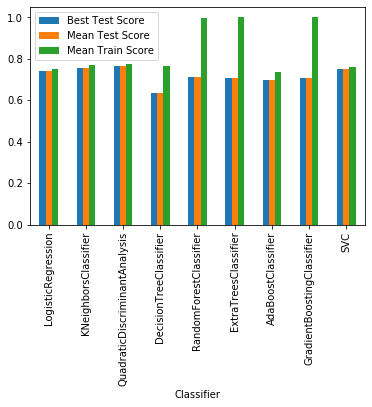

In [118]:
GridS_BS_plot.plot(x="Classifier", y=["Best Test Score", "Mean Test Score", "Mean Train Score"], kind="bar")
plt.show()

__Observation:__ Here we can see the results of best Hyperparameter brings same values in 'Best Test Score', 'Mean Test Score'. 'Mean Train Score' Column here shows the best Train Score base don Hyperparameter I have passed.

<a name = Section83></a>
## 8.3. Ensemble Methods
<a name = Section831></a>
### 8.3.1. Voting Classifier

In [99]:
#Let's take voting of following 4 classifiers performances
vote_est = [
    #RandomForestClassifier 
    ('rfc', ensemble.RandomForestClassifier()),    
    #Nearest Neighbor
    ('knn', neighbors.KNeighborsClassifier()),    
    #xgboost:
   ('xgb', XGBClassifier(objective="multi:softmax", eval_metric = "merror")),
   ('lgbm',LGBMClassifier())

]

seed = 123
skf = model_selection.ShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = seed )
#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X_std, y, cv  = skf,scoring='f1_macro', return_train_score=True)
vote_hard.fit(X_std, y)
#print Scores
print("Hard Voting Train w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100))
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_std, y, cv  = skf,scoring='f1_macro', return_train_score=True)
vote_soft.fit(X_std, y)

print("Soft Voting Train w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100))
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Train w/bin score mean: 99.23
Hard Voting Test w/bin score mean: 72.96
Hard Voting Test w/bin score 3*std: +/- 14.46
----------
Soft Voting Train w/bin score mean: 99.23
Soft Voting Test w/bin score mean: 72.94
Soft Voting Test w/bin score 3*std: +/- 8.89
----------


__Observation:__
  Voting Classifier Ensemble has given score scores which are closely matching with scores of RandomForestClasifier we have run during our Hyperparameter tuning.

<a name = Section832></a>
### 8.3.2. Bagging Classifier

In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

seed = 123
skf = model_selection.ShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = seed )

bagging_cv = model_selection.cross_validate(bag_clf, X_std, y, cv  = skf,scoring='f1_macro', return_train_score=True)
bag_clf.fit(X_std, y)
#print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Bagging Train score mean: {:.2f}". format(bagging_cv['train_score'].mean()*100))
print("Bagging Test score mean: {:.2f}". format(bagging_cv['test_score'].mean()*100))
print("Bagging Test score 3*std: +/- {:.2f}". format(bagging_cv['test_score'].std()*100*3))
print('-'*10)


Bagging Train score mean: 92.98
Bagging Test score mean: 75.16
Bagging Test score 3*std: +/- 8.48
----------


__Observation:__ Bagging Ensemble using base estimator as DecisionTree has surely shown better result than Decision Tree alone. It's Train and Test Scores look good. However, there could be a indication of overfitting in train score because test score has come low but still better than Many other models we have trained so far. TestScore*3*STD shows that test score may vary (+/-)10.22 as Model trains and tests on 99.97% of data points   

<a name = Section833></a>
### 8.3.3. Ensemble of Stacking

Stacking will help us take classification errors of one level of classifiers to next level to train model in next level classifiers. We are taking KNeighborsClassifier, RandomForestClassifier,XGBClassifier and LGBMClassifier as our first stack and LogisticRegression as our Metaclassifier. This helps in getting better test results. Let's see how it turns up for our dataset. 

In [101]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = XGBClassifier(objective="multi:softmax", eval_metric = "merror")
clf4 = LGBMClassifier()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4], use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3,clf4, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'XGBClassifier',
                       'LGBMClassifier',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_std, y, 
                                              cv=3, scoring='f1_macro')
    print("f1 Score: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

f1 Score: 0.65 (+/- 0.01) [KNN]
f1 Score: 0.69 (+/- 0.03) [Random Forest]
f1 Score: 0.69 (+/- 0.02) [XGBClassifier]
f1 Score: 0.70 (+/- 0.02) [LGBMClassifier]
f1 Score: 0.69 (+/- 0.01) [StackingClassifier]


__Observation:__ Looking at test scores we can say Stacking Classifier has given better result but LGBMClassifer has performed better than that. Stacking in general is a resource intensive and timeconsuming Model and should be used only when its giving really better result than all other methods. </br>


__Let's see our classifiers performance by plotting a graph to show decision regions__

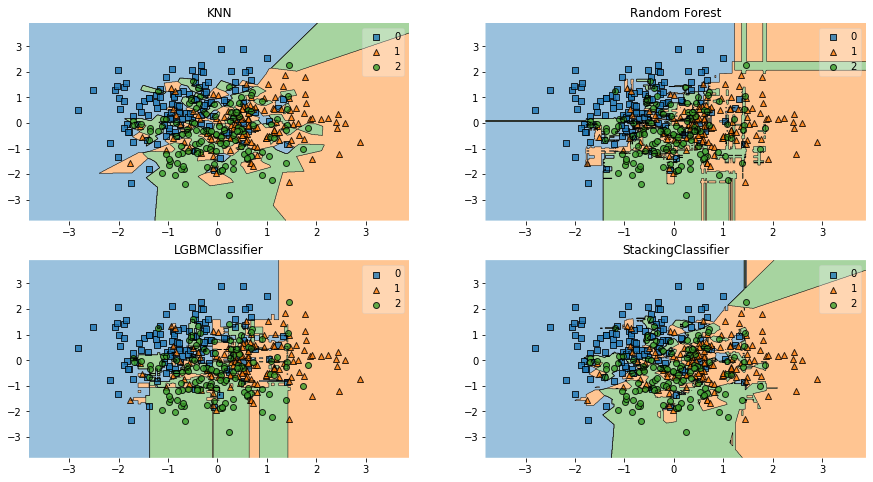

In [102]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(15,8))

for clf, lab, grd in zip([clf1, clf2, clf4, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'LGBMClassifier',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(data_sd.iloc[:,0:2].values, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=data_sd.iloc[:,0:2].values, y=y, clf=clf)
    plt.title(lab)

__Observation:__ Looking at above plots which is created by taking two prominant features to predict we can say our Models are  not able to predict good enough to show good seperation of predicted results. Out of above we can say that Stacking has shown best results with best seperation boundaries.

# 9. Conclusion

In this excercise we have taken small dataset for training our models on a multiclass Target Variable. As part of our process I have performed standard path of Machine learning i.e. (EDA --> Data Cleanup--> Base Model Preprartion --> Model Evaluation--> Feature selection --> Model Preparation with selected Feature --> Models with Best Hyperparamters --> Ensemble Modelling --> Model Evaluation and comparison of model's predicability as well as interpretability. Here are my conclusive findings:

 - Based on our initial observation the data is non-linear. 
 - All Non-Linear Algorithms trained well and have given good prediction accuracy as well. 
 - As this problem was to identify the creature with maximum accuracy I have chosen f1 score as compared to Precision or Recall as our Model prediction performance paramters. 
 - The best prediction score we got was 0.76635 for our GassianNB classifier however, it has given low training rate as well.  
 - The best results in terms of both Train and Test results was of Bagging classifier with a train score of 99.23 and test score of 72.96. We surely need more data in our dataset to improve on our Model predictions. 
 - With this accuracy we need to stay more prepared to expect a wrong identification of Creature and deal with Zeal!